In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasetmanu.csv')

In [ ]:
data.reset_index(drop=True, inplace=True)
#Good for Circularity
#Worse for Conicity
#Okay for Overcut

In [ ]:
data
y = data['Circularity']

In [ ]:
data.columns

Index(['Expt.No', 'Electrolyte', 'Voltage', 'Feed Rate ', 'Duty cycle', 'MRR',
       'Circularity', 'Conicity', 'Overcut'],
      dtype='object')

In [ ]:
data1 = data.drop(['MRR','Overcut', 'Conicity'], axis = 1)

In [ ]:
data

,Expt.No,Electrolyte,Voltage,Feed Rate,Duty cycle,MRR,Circularity,Conicity,Overcut
0,0,CPE,6,0.5,0.8,0.04060,0.008,1.071,0.1950
1,1,CPE,8,0.6,0.7,0.05630,0.016,1.883,0.0640
2,2,CPE,7,0.5,0.7,0.07160,0.025,2.102,0.1325
3,3,CPE,6,0.5,0.6,0.04910,0.010,0.357,0.3056
4,4,CPE,7,0.6,0.8,0.05020,0.013,1.831,0.0683
...,...,...,...,...,...,...,...,...,...
380,380,NaNo3,7,0.6,0.7,0.00022,0.003,0.257,0.3269
381,381,NaNo3,6,0.5,0.7,0.00026,0.002,0.194,0.3455
382,382,NaNo3,7,0.6,0.6,0.00016,0.003,0.333,0.1651
383,383,NaNo3,8,0.5,0.6,0.00019,0.004,0.518,0.2015


In [ ]:
"""
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

for train_index, test_index in kf.split(data):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = data[train_index], data[test_index]
      y_train, y_test = y[train_index], y[test_index]
      """

'\nfrom sklearn.model_selection import KFold \nfrom sklearn.model_selection import RepeatedKFold\nkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) \n\nfor train_index, test_index in kf.split(data):\n      print("Train:", train_index, "Validation:",test_index)\n      X_train, X_test = data[train_index], data[test_index] \n      y_train, y_test = y[train_index], y[test_index]\n      '

In [ ]:
data['Electrolyte'].unique()

array(['CPE', 'NaCl', 'NaNo3'], dtype=object)

In [ ]:
data['Electrolyte'] = data['Electrolyte'].map({'NaCl': 1, 'NaNo3': 2, 'CPE' : 3})

In [ ]:
from sklearn import linear_model

In [ ]:
x = data.loc[:, ['Expt.No', 'Electrolyte', 'Voltage', 'Feed Rate ']]

In [ ]:
y = data['Circularity']

In [ ]:
print(x)

     Expt.No  Electrolyte  Voltage  Feed Rate 
0          0            3        6         0.5
1          1            3        8         0.6
2          2            3        7         0.5
3          3            3        6         0.5
4          4            3        7         0.6
..       ...          ...      ...         ...
380      380            2        7         0.6
381      381            2        6         0.5
382      382            2        7         0.6
383      383            2        8         0.5
384      384            2        8         0.5

[385 rows x 4 columns]


In [ ]:
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
 expected = []
 for ele in y_test:
   expected.append(ele)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
predicted = regressor.predict(x_test)
np.sqrt(mean_squared_error(y_test, predicted))

0.005650659123731773

In [ ]:
print(y_test)

17     0.011
211    0.011
355    0.004
102    0.018
125    0.006
       ...  
0      0.008
326    0.003
255    0.004
268    0.001
93     0.018
Name: Circularity, Length: 116, dtype: float64


In [ ]:
print(predicted)

[ 2.17284428e-02  7.81574737e-03  1.95487166e-03  1.60978007e-02
  1.58477825e-02  8.36968538e-03  6.58331636e-03  1.02699037e-02
  8.33152207e-03  2.02623724e-02  1.51854007e-02  7.63097703e-03
  6.96659546e-03  9.32868691e-03  1.72108146e-02  1.30080796e-02
  1.49628401e-02  7.65276145e-03  1.33990317e-02  5.37029695e-03
  9.66206411e-03  5.61464201e-03  7.33246279e-03  3.96920685e-03
  8.41628694e-03  8.32622191e-03  2.41107165e-03  4.05083362e-03
  1.15908783e-02  5.06070399e-03  1.95782062e-02  1.85737414e-02
  1.08944951e-02  1.83293964e-02  1.24868994e-02  1.31859331e-02
  7.61827149e-03  9.52075724e-03  3.66728690e-03  2.11908836e-02
  1.82805274e-02  6.28783484e-03  1.13343162e-02  6.10533195e-03
  4.60450401e-03  4.41470113e-03  4.83273781e-03  2.44896732e-03
  6.02737853e-03  1.46207570e-02  9.65098539e-03  5.07178271e-03
  5.78303347e-03  7.03924872e-03  1.40507077e-02  2.55200551e-03
  2.26446461e-03  8.21740517e-03  1.06283656e-02  8.46742340e-03
  2.03005357e-02  4.70224

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

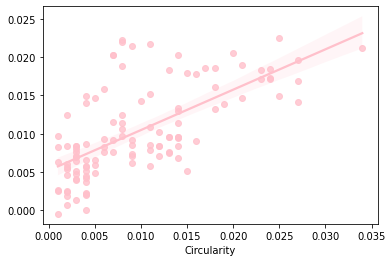

In [ ]:
sns.regplot(x = y_test, y = predicted, color = 'pink',ci=95)
plt.show()

In [ ]:
print(len(predicted))
print(len(expected))

116
116


0 0.011
>0.0, 0.0 = 0.011
1 0.011
>0.0, 0.0 = 0.003
2 0.004
>0.0, 0.0 = 0.002
3 0.018
>0.0, 0.0 = 0.002
4 0.006
>0.0, 0.0 = 0.010
5 0.012
>0.0, 0.0 = 0.004
6 0.004
>0.0, 0.0 = 0.003
7 0.012
>0.0, 0.0 = 0.002
8 0.012
>0.0, 0.0 = 0.004
9 0.007
>0.0, 0.0 = 0.013
10 0.011
>0.0, 0.0 = 0.004
11 0.007
>0.0, 0.0 = 0.001
12 0.003
>0.0, 0.0 = 0.004
13 0.006
>0.0, 0.0 = 0.003
14 0.024
>0.0, 0.0 = 0.007
15 0.014
>0.0, 0.0 = 0.001
16 0.004
>0.0, 0.0 = 0.011
17 0.013
>0.0, 0.0 = 0.005
18 0.014
>0.0, 0.0 = 0.001
19 0.002
>0.0, 0.0 = 0.003
20 0.001
>0.0, 0.0 = 0.009
21 0.002
>0.0, 0.0 = 0.004
22 0.009
>0.0, 0.0 = 0.002
23 0.003
>0.0, 0.0 = 0.001
24 0.002
>0.0, 0.0 = 0.006
25 0.014
>0.0, 0.0 = 0.006
26 0.002
>0.0, 0.0 = 0.000
27 0.003
>0.0, 0.0 = 0.001
28 0.007
>0.0, 0.0 = 0.005
29 0.004
>0.0, 0.0 = 0.001
30 0.027
>0.0, 0.0 = 0.007
31 0.017
>0.0, 0.0 = 0.002
32 0.011
>0.0, 0.0 = 0.000
33 0.023
>0.0, 0.0 = 0.005
34 0.002
>0.0, 0.0 = 0.010
35 0.018
>0.0, 0.0 = 0.005
36 0.003
>0.0, 0.0 = 0.005
37 0.014
>0

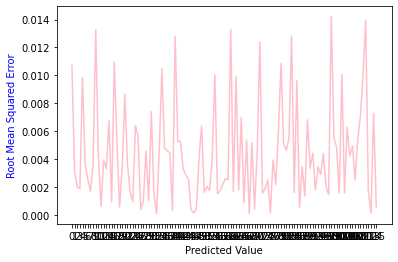

In [ ]:
from matplotlib import pyplot
errors = []
for i in range(len(expected)):
	# calculate error
  print(i, expected[i])
  err = ((expected[i] - predicted[i])**2)
  err=math.sqrt(err)
	# store error
  errors.append(err)
	# report error
  print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
# plot errors
pyplot.plot(errors,color='pink')
pyplot.xticks(ticks=[i for i in range(len(expected))])
pyplot.xlabel('Predicted Value',)
pyplot.ylabel('Root Mean Squared Error',color='blue')
pyplot.show()

In [ ]:
#Conicity
from sklearn.metrics import r2_score
r2_score(expected, predicted)
plot

NameError: ignored

In [ ]:
errors = []
for i in range(len(expected)):
	# calculate error
  print(i, expected[i])
  err = (expected[i] - predicted[i])**2
	# store error
  errors.append(err)
	# report error
  print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
  sns.jointplot()

In [ ]:
#Circularity
r2_score(expected, predicted)

0.40856384332206563

In [ ]:
#Overcut
r2_score(expected, predicted)

0.5197427615924188

In [ ]:
x_train


,Expt.No,Electrolyte,Voltage,Feed Rate
93,93,3,8,0.5
238,238,1,6,0.6
203,203,1,6,0.6
357,357,2,7,0.6
370,370,2,6,0.6
...,...,...,...,...
354,354,2,8,0.5
237,237,1,7,0.7
64,64,3,6,0.6
281,281,2,6,0.6
